# structured data validation 

tools:  
1. tidyverse and the dslabs gapminder dataset

In [28]:
library(dslabs)
library(tidyverse)

In [29]:
data(package='dslabs')

Package,Item,Title
dslabs,admissions,Gender bias among graduate school admissions to UC Berkeley.
dslabs,divorce_margarine,Divorce rate and margarine consumption data
dslabs,gapminder,Gapminder Data
dslabs,heights,Self-Reported Heights
dslabs,murders,US gun murders by state for 2010
dslabs,na_example,Count data with some missing values
dslabs,oecd (gapminder),Gapminder Data
dslabs,opec (gapminder),Gapminder Data
dslabs,outlier_example,Adult male heights in feet with outliers
dslabs,polls_us_election_2016,Fivethirtyeight 2016 Poll Data


In [30]:
data(gapminder)

In [31]:
str(gapminder)

'data.frame':	10545 obs. of  9 variables:
 $ country         : Factor w/ 185 levels "Albania","Algeria",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ year            : int  1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 ...
 $ infant_mortality: num  115.4 148.2 208 NA 59.9 ...
 $ life_expectancy : num  62.9 47.5 36 63 65.4 ...
 $ fertility       : num  6.19 7.65 7.32 4.43 3.11 4.55 4.82 3.45 2.7 5.57 ...
 $ population      : num  1636054 11124892 5270844 54681 20619075 ...
 $ gdp             : num  NA 1.38e+10 NA NA 1.08e+11 ...
 $ continent       : Factor w/ 5 levels "Africa","Americas",..: 4 1 1 2 2 3 2 5 4 3 ...
 $ region          : Factor w/ 22 levels "Australia and New Zealand",..: 19 11 10 2 15 21 2 1 22 21 ...


## common business scenario: train model on data from one region, apply model to data from another region. need to know if model generalises across difference regions

In [32]:
unique(gapminder$region)

[1] Southern Europe           Northern Africa          
 [3] Middle Africa             Caribbean                
 [5] South America             Western Asia             
 [7] Australia and New Zealand Western Europe           
 [9] Southern Asia             Eastern Europe           
[11] Central America           Western Africa           
[13] Southern Africa           South-Eastern Asia       
[15] Eastern Africa            Northern America         
[17] Eastern Asia              Northern Europe          
[19] Melanesia                 Polynesia                
[21] Central Asia              Micronesia               
22 Levels: Australia and New Zealand Caribbean Central America ... Western Europe

In [39]:
west <- c("Western Europe","Northern Europe","Southern Europe",
          "Northern America","Australia and New Zealand")

gapminder <- gapminder %>%
  mutate(group = case_when(
    region %in% west ~ "The West",
    region %in% c("Eastern Asia", "South-Eastern Asia") ~ "East Asia",
    region %in% c("Caribbean", "Central America", "South America") ~ "Latin America",
    continent == "Africa" & region != "Northern Africa" ~ "Sub-Saharan Africa",
    TRUE ~ "Others"))

In [40]:
unique(gapminder$group)

[1] "The West"           "Others"             "Sub-Saharan Africa"
[4] "Latin America"      "East Asia"

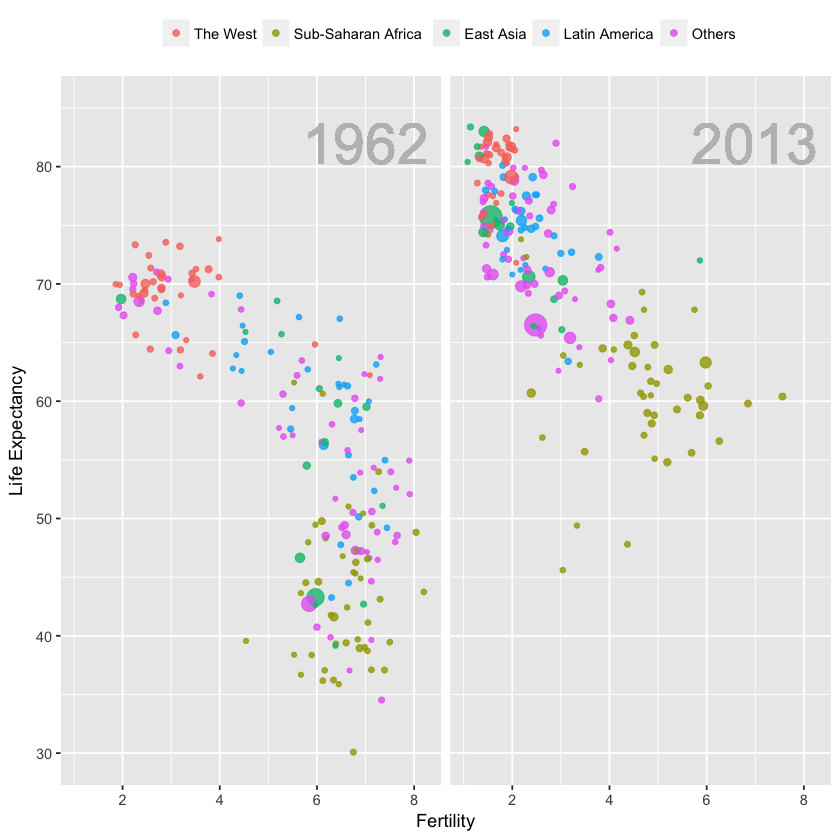

In [50]:
gapminder <- gapminder %>%
  mutate(group = factor(group, levels = rev(c("Others", "Latin America", "East Asia","Sub-Saharan Africa", "The West"))))

filter(gapminder, year%in%c(1962, 2013) & !is.na(group) &
         !is.na(fertility) & !is.na(life_expectancy)) %>%
  mutate(population_in_millions = population/10^6) %>%
  ggplot( aes(fertility, y=life_expectancy, col = group, size = population_in_millions)) +
  geom_point(alpha = 0.8) +
  guides(size=FALSE) +
  theme(plot.title = element_blank(), legend.title = element_blank()) +
  coord_cartesian(ylim = c(30, 85)) +
  xlab("Fertility") +
  ylab("Life Expectancy") +
  geom_text(aes(x=7, y=82, label=year), cex=12, color="grey") +
  facet_grid(. ~ year) +
  theme(strip.background = element_blank(),
        strip.text.x = element_blank(),
        strip.text.y = element_blank(),
   legend.position = "top")

Imagine this scenario. How would you validate the new data coming in? 


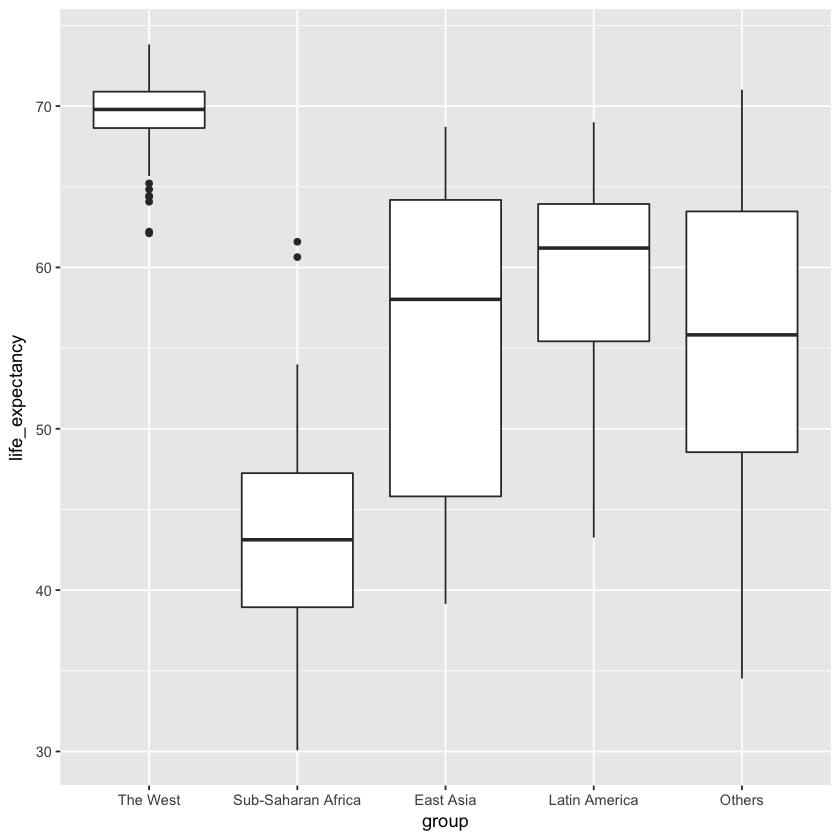

In [64]:
gapminder %>% 
    filter(year==1962) %>%
    ggplot(aes(group, y=life_expectancy)) + 
    geom_boxplot()

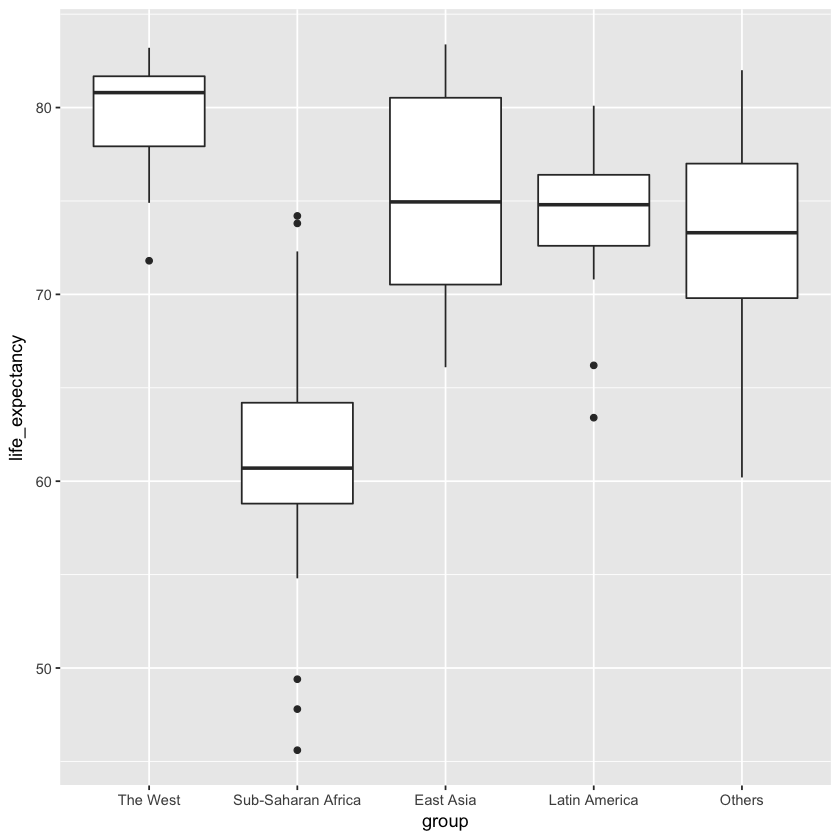

In [62]:
gapminder %>% 
    filter(year==2013) %>%
    ggplot(aes(group, y=life_expectancy)) + 
    geom_boxplot()

# snazzier viz using gganimate

In [88]:
library(gganimate)
library(readr)
library(gapminder)
library(ggplot2)

In [92]:
str(gapminder)

'data.frame':	10545 obs. of  9 variables:
 $ country         : Factor w/ 185 levels "Albania","Algeria",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ year            : int  1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 ...
 $ infant_mortality: num  115.4 148.2 208 NA 59.9 ...
 $ life_expectancy : num  62.9 47.5 36 63 65.4 ...
 $ fertility       : num  6.19 7.65 7.32 4.43 3.11 4.55 4.82 3.45 2.7 5.57 ...
 $ population      : num  1636054 11124892 5270844 54681 20619075 ...
 $ gdp             : num  NA 1.38e+10 NA NA 1.08e+11 ...
 $ continent       : Factor w/ 5 levels "Africa","Americas",..: 4 1 1 2 2 3 2 5 4 3 ...
 $ region          : Factor w/ 22 levels "Australia and New Zealand",..: 19 11 10 2 15 21 2 1 22 21 ...


In [96]:
p <- ggplot(gapminder, aes(gdp, life_expectancy, size = population, color = continent, frame = year)) +
  geom_point() +
  scale_x_log10()

In [ ]:
gganimate(p)